# <a id='1'>Обзоры на приложения в Google Play Store</a>  

https://www.kaggle.com/gauthamp10/google-playstore-apps 

1. Подготовьте список самых популярных приложений по категориям
2. Какие приложения самые дорогие (и категории)
3. Какие категории содержат самое большое количество приложений без отзывов 

# Загрузка пакетов


In [3]:
import gc
import os
import logging
import datetime
import warnings
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np 

#####  Загрузка данных

In [4]:
IS_LOCAL = False
if(IS_LOCAL):
    PATH="https://www.kaggle.com/gauthamp10/google-playstore-apps"
else:
    PATH="data"
os.listdir(PATH)

['Google-Playstore.csv']

In [5]:
%%time
apps = pd.read_csv('data/Google-Playstore.csv')

Wall time: 13.8 s


### <a id='2'>АНАЛИЗ ДАННЫХ</a>  



## <a id='31'>Проверяем данные</a>  



In [6]:
apps.shape

(2312944, 24)

In [7]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [8]:
apps.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [9]:
apps.describe(include='O')

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
count,2312942,2312944,2312944,2312837,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944
unique,2177944,2312944,48,22,15,1657,154,758371,810440,950456,4158,3918,6,977743,67374
top,Tic Tac Toe,com.magzter.champaktelugu,Education,100+,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,2021-06-16 07:35:57
freq,382,1,241090,443368,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,56


In [10]:
apps.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


### Данные представляют собой таблицу в 24 столбца и 2312944 строк- приложения Google:
                        App Name         Имя приложения
                        App Id   Идентификатор приложения
                        Category  Категория
                        Rating  Оценка
                        Rating Count  Количество Рейтингов
                        Installs   Установка
                        Minimum Installs  Минимальные Установки
                        Maximum Installs  Максимальная Установка
                        Free   Бесплатно
                        Price   Цена
                        Currency  Валюта
                        Size   Размер
                        Minimum Android   Минимум Android
                        Developer Id    Идентификатор разработчика
                        Developer Website    Сайт разработчика
                        Developer Email   Электронная почта разработчика
                        Released   Выпущенный
                        Privacy Policy   Политика конфиденциальности
                        Last Updated   Последнее обновление
                        Content Rating   Рейтинг Контента
                        Ad Supported   Поддержка рекламы
                        In app purchases   Покупки в приложении
                        Editor Choice    Выбор редактора
                        Scraped Time   Собранное время


In [11]:
# Графики распределения данных столбцов
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]] #Отображаем только столбцы, имеющие менее 100 уникальных значений   
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

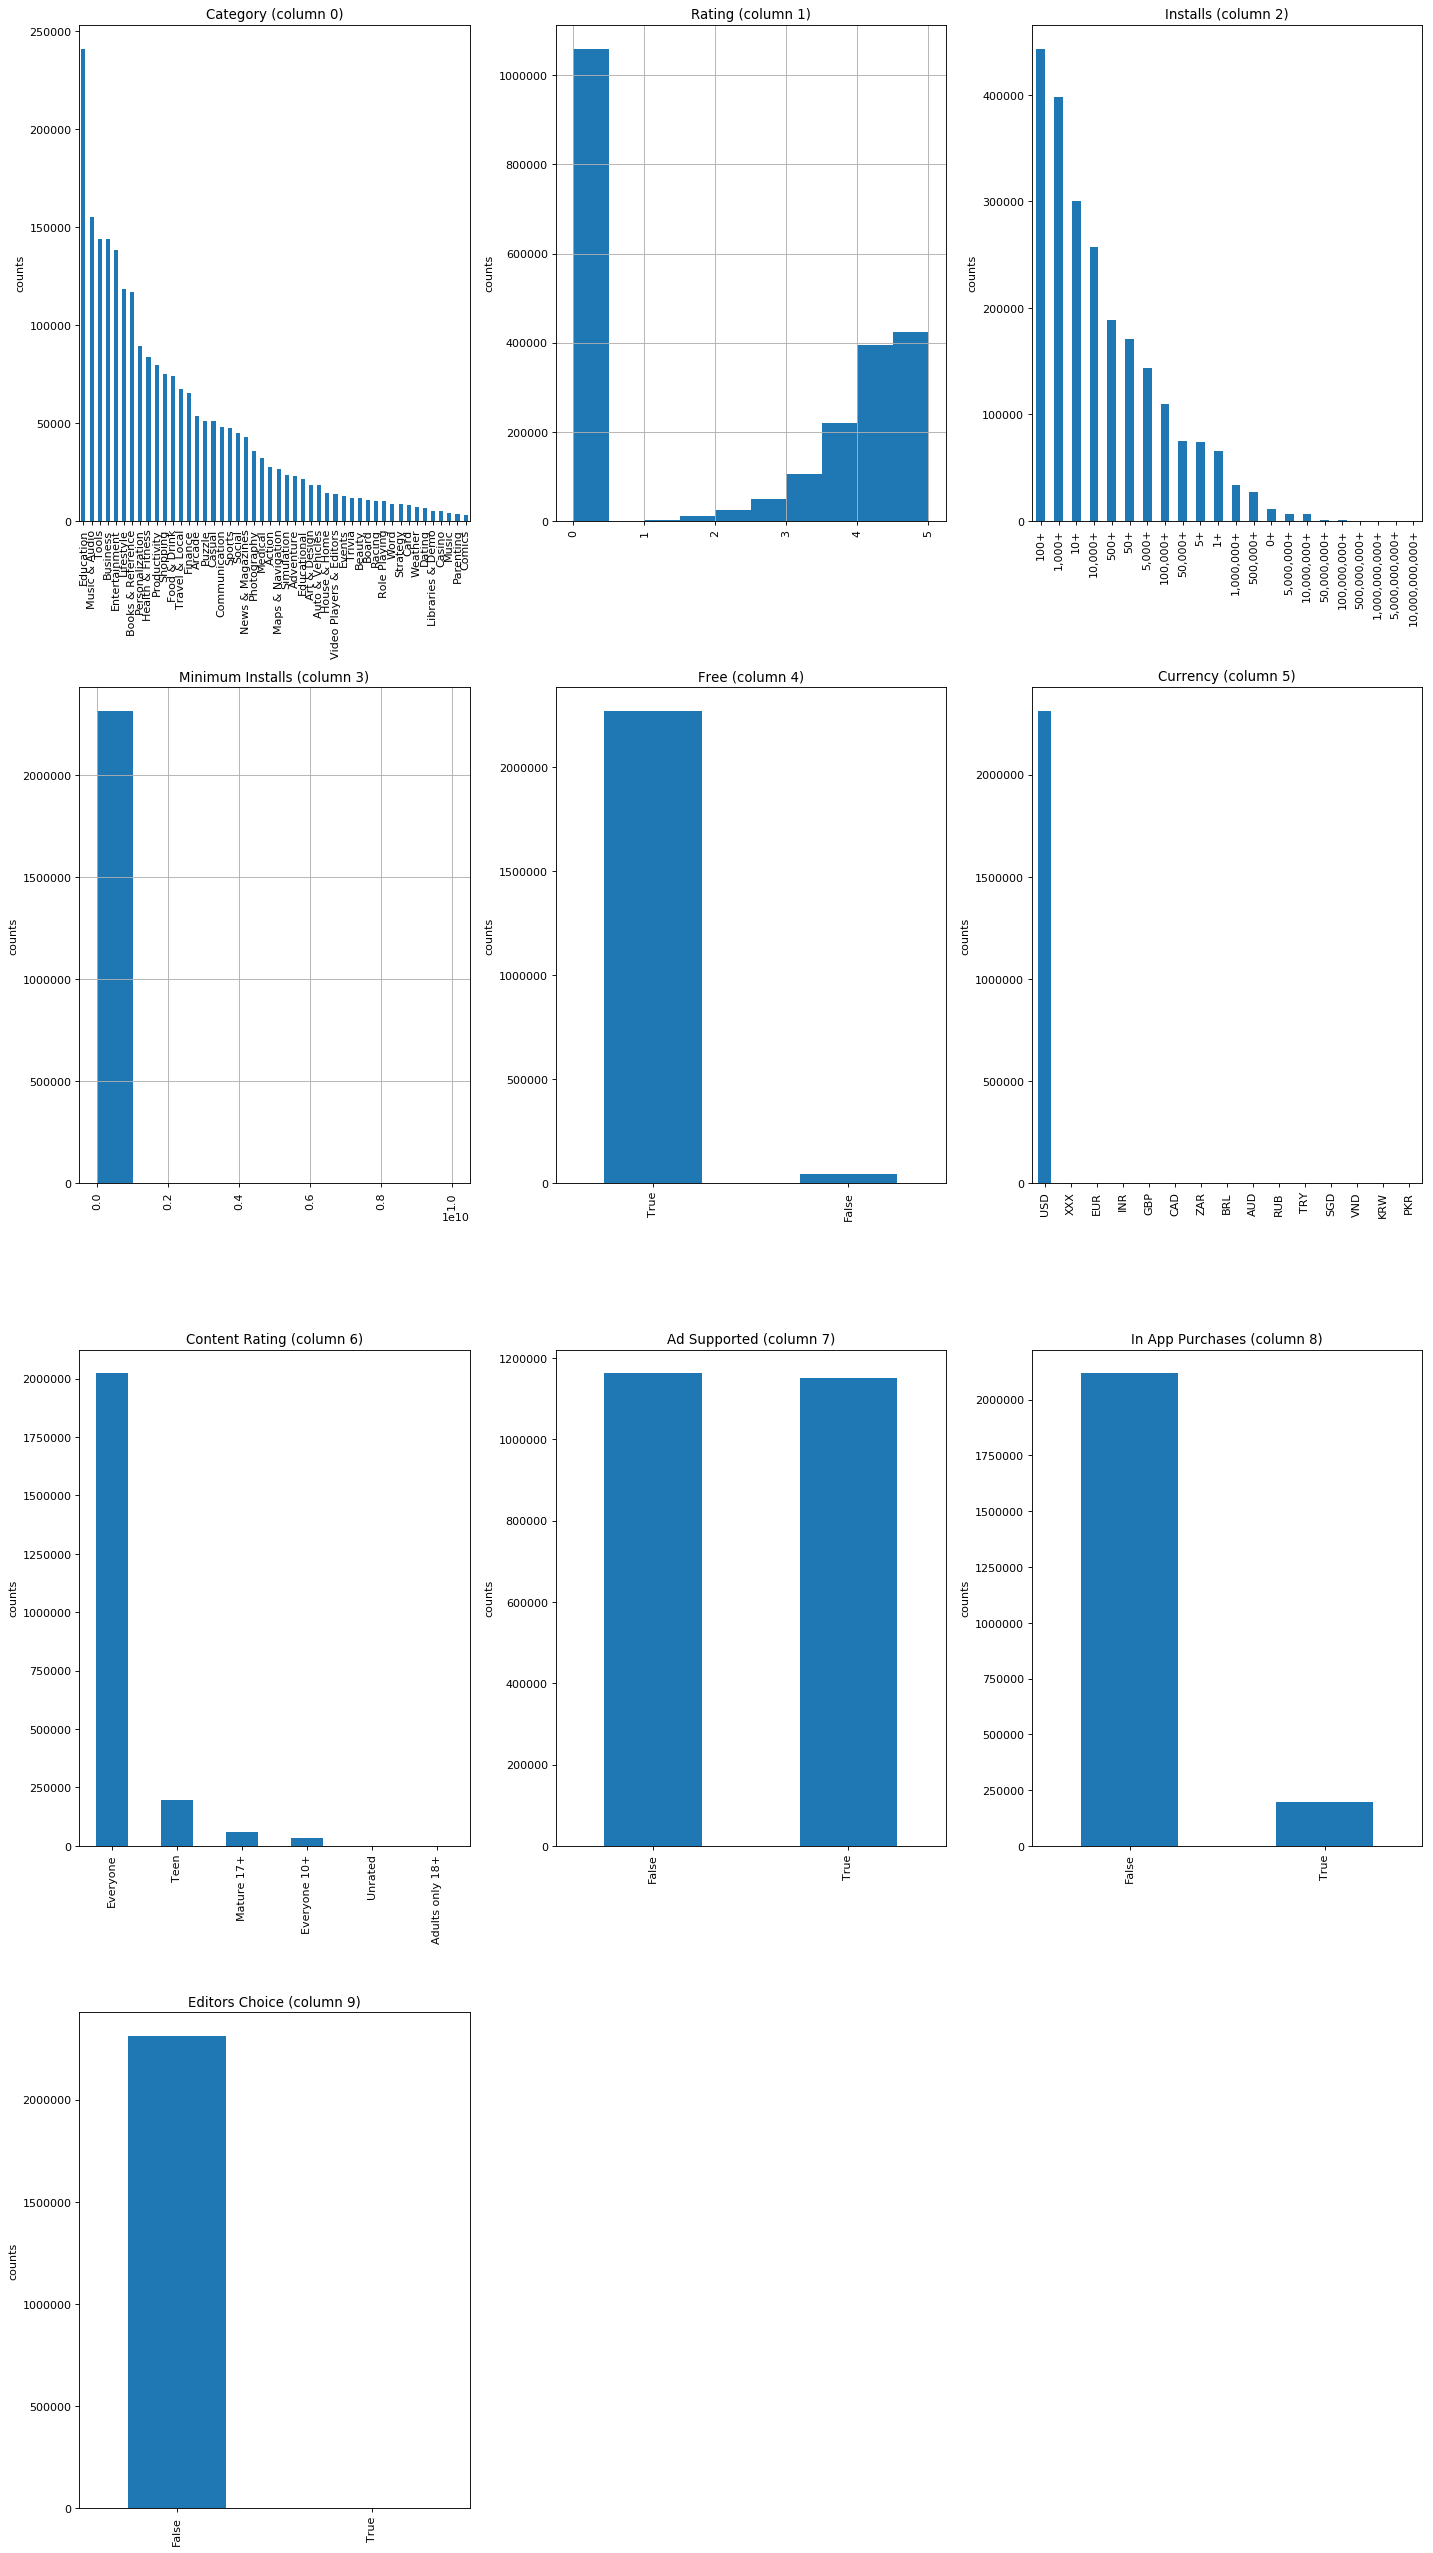

In [12]:
plotPerColumnDistribution(apps, 24, 3)

In [13]:
apps1=apps[(apps["Rating Count"]==apps["Rating Count"].max())]
apps1

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
385470,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,"5,000,000,000+",5.000000e+09,6265637751,True,0.0,...,http://www.whatsapp.com/,android@support.whatsapp.com,"Oct 18, 2010","Jun 09, 2021",Everyone,http://www.whatsapp.com/legal/#Privacy,False,False,True,2021-06-16 02:51:24


In [14]:
apps2=apps[(apps["Maximum Installs"]==apps["Maximum Installs"].max())]
apps2

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


In [15]:
np.unique(str(apps['Size'].values))

array(["['10M' '2.9M' '3.7M' ... '29M' '10M' '5.2M']"], dtype='<U44')

In [16]:
np.unique(str(apps['Released'].values))

array(["['Feb 26, 2020' 'May 21, 2020' 'Aug 9, 2019' ... 'Aug 19, 2018'\n 'Aug 1, 2016' 'Aug 9, 2019']"],
      dtype='<U93')

In [17]:
apps[(apps["In App Purchases"] == True)].shape

(195309, 24)

In [18]:
apps[(apps["Editors Choice"] == True)].shape

(853, 24)

## <a id='31'>Проанализируем категории</a>  
И построим рейтинг популярности

In [19]:
#перечень категорий
np.unique(apps['Category'].values)

array(['Action', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles',
       'Beauty', 'Board', 'Books & Reference', 'Business', 'Card',
       'Casino', 'Casual', 'Comics', 'Communication', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical',
       'Music', 'Music & Audio', 'News & Magazines', 'Parenting',
       'Personalization', 'Photography', 'Productivity', 'Puzzle',
       'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social',
       'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word'], dtype=object)

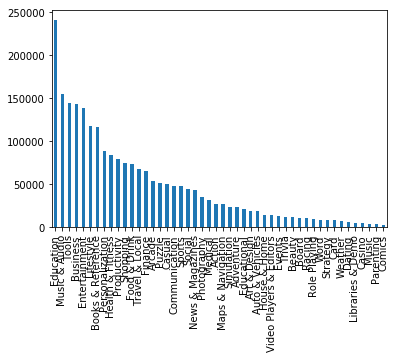

In [29]:
#посмотрим на количество приложений по категориям
pd.value_counts(apps['Category']).plot.bar();

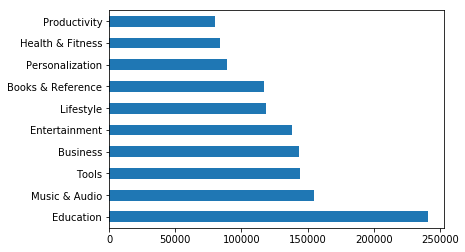

In [21]:
# Количество приложений по категориям -10 самых крупных
apps['Category'].value_counts().head(10).plot.barh()

In [22]:
#проанализируем, какие значения можно взять для построения рейтинга. Берем оценку, её количество и количество скачиваний.
apps.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [24]:
#построим интерактивный выбор категорий
from ipywidgets import widgets, interactive

In [28]:
# Топ N самых популярных приложений в каждой категории по рейтингу
N=10
categories = set(apps["Category"])

category = widgets.Dropdown(
    options = categories,
    description = 'Category: ' 
)
#максимальные значения для нормализации
mean_rating = apps["Rating"].mean()
mean_rating_count = apps["Rating Count"].mean()
#max_minimum_installs = apps["Minimum Installs"].max()
mean_maximum_installs = apps["Maximum Installs"].mean()
#веса
w1, w2, w3 = 0.25, 0.25, 0.5

def get_custom_rating(row):
    return w1*row["Rating"]/mean_rating + w2*row["Rating Count"]/mean_rating_count + w3*row["Maximum Installs"]/mean_maximum_installs
    
apps["Custom Rating"] = apps.apply(lambda row: get_custom_rating(row), axis=1)

def draw_plot(category):
    most_popular = apps[apps["Category"] == category].sort_values(by="Custom Rating", ascending=False).head(N)
    data = most_popular.plot.barh(x="App Name", y="Custom Rating")
    plt.show()

interactive(draw_plot, category=category)

interactive(children=(Dropdown(description='Category: ', options=('Casual', 'Education', 'Card', 'Events', 'Bo…

###### <a id='31'>Проанализируем стоимость приложений и категорий</a>  
Из гистограмм выше видим, что практически вся стоимость приложений указана в usd, но есть и другие валюты. Сделаем анализ более универсальным, переведем стоимость приложений в рубли

In [32]:
#установим пакет для курсов валют ЦБ
from pycbrf import ExchangeRates 

In [33]:
#котировки валют
today = date.today().strftime("%Y-%m-%d")
print(f"Загружаем котировки валют за сегодня: {today}")
rates = ExchangeRates(today, locale_en=True)

Загружаем котировки валют за сегодня: 2021-07-15


In [34]:
#Проверим какие валюты можем перевести
currencies = set(apps["Currency"])
print(f"Всего {len(currencies)} валют")
print(currencies)
for currency in currencies:
    if(currency != 'XXX' and not pd.isna(currency)):
        rate = rates[currency]
        if(rate is not None):
            print(f"{currency}: {rates[currency].rate}")
        else:
            print(f"Валюта {currency} не определена")

Всего 16 валют
{nan, 'BRL', 'XXX', 'AUD', 'USD', 'PKR', 'CAD', 'INR', 'GBP', 'TRY', 'ZAR', 'KRW', 'SGD', 'EUR', 'RUB', 'VND'}
BRL: 14.3545
AUD: 55.2147
USD: 74.1236
Валюта PKR не определена
CAD: 59.2704
INR: 0.993714
GBP: 102.6982
TRY: 8.59713
ZAR: 5.02768
KRW: 0.0644867
SGD: 54.6997
EUR: 87.3917
Валюта RUB не определена
Валюта VND не определена


In [35]:
#  PKR - пакистанская рупия, VND - вьетнамский донг, определим вручную...RUB и так рубль )

In [36]:
# Добавим колонку price_rub цена в рублях
handle_dict = {'PKR': 0.47, 'VND': 0.0032}
def get_price_rub(price, currency):
    total_rub = None
    if(currency != 'XXX' and not pd.isna(currency)):
        rate = rates[currency]
        if(rate is not None):
            total_rub = price * float(rate.rate)
        if(currency in handle_dict):
            total_rub = price * handle_dict[currency]
        if( currency == 'RUB'):
            total_rub = price
    return total_rub

In [37]:
apps["Price_rub"] = apps.apply(lambda row: get_price_rub(row["Price"], row["Currency"]), axis=1)
apps_not_free = apps[(apps["Free"] == False)]
apps_not_free.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Custom Rating,Price_rub
273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,"10,000+",10000.0,34125,False,1.99,...,"Nov 30, 2018","Apr 08, 2019",Everyone,http://htmlpreview.github.io/?https://github.c...,False,False,False,2021-06-15 20:19:52,0.584513,147.505964
296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,"10,000+",10000.0,10407,False,4.99,...,"Feb 7, 2017","Dec 22, 2020",Everyone,https://www.hole19golf.com/terms/#PrivacyPolicy,False,False,False,2021-06-15 20:19:53,0.347940,369.876764
417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,"10,000+",10000.0,12019,False,0.99,...,"Oct 4, 2012","Feb 09, 2014",Everyone,NaN,False,False,False,2021-06-15 20:20:00,0.456766,73.382364
554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1+,1.0,2,False,2.99,...,"Mar 15, 2017","Mar 15, 2017",Everyone,http://mobile.mebook-buy.com/android/privacy.html,False,False,False,2021-06-15 20:20:07,0.000003,221.629564
618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,"10,000+",10000.0,23644,False,0.99,...,"Nov 3, 2020","Feb 05, 2021",Everyone,https://bestridesimulators.com/lunaria-games-s-l/,True,True,False,2021-06-15 20:20:11,0.569174,73.382364
637,Bukuu - Akibat Menipu,bukuu.com.my.siri.haiwan.akibat.menipu,Education,0.0,0.0,1+,1.0,2,False,1.99,...,"Jan 12, 2016","Jan 13, 2016",Everyone,https://www.mmsc.com.my/bukuu/terma-penggunaan...,False,False,False,2021-06-15 20:20:13,0.000003,147.505964
661,JOTNA MEDIA GROUP,com.app.jotnamediagroupi,Business,4.9,19.0,100+,100.0,487,False,4.99,...,"Jun 15, 2020","Jun 15, 2020",Everyone,https://appcdn.media/privacy/?app=JOTNA%20MEDI...,True,False,False,2021-06-15 20:20:14,0.558440,369.876764
775,"Web Development PRO (HTML, CSS)",com.technoapps.webdevelopmentpro,Education,4.5,79.0,"5,000+",5000.0,7391,False,3.49,...,"Dec 14, 2019","Dec 14, 2019",Everyone,https://technoapps92.blogspot.com/p/blog-page_...,False,False,False,2021-06-15 20:20:20,0.529067,258.691364
786,K8 CODE PRIME,appinventor.ai_mc207742.K8_CODE_PRIME,Tools,0.0,0.0,10+,10.0,38,False,24.99,...,"Aug 8, 2019","Aug 09, 2019",Everyone,NaN,False,False,False,2021-06-15 20:20:20,0.000059,1852.348764
796,Kila: The Lazy Pig,kila.thelazypig,Books & Reference,0.0,0.0,1+,1.0,2,False,0.99,...,"Aug 10, 2020","Aug 10, 2020",Everyone,http://www.kilafun.com/privacy/,False,False,False,2021-06-15 20:20:21,0.000003,73.382364


In [65]:
apps_not_free.shape

(45068, 26)

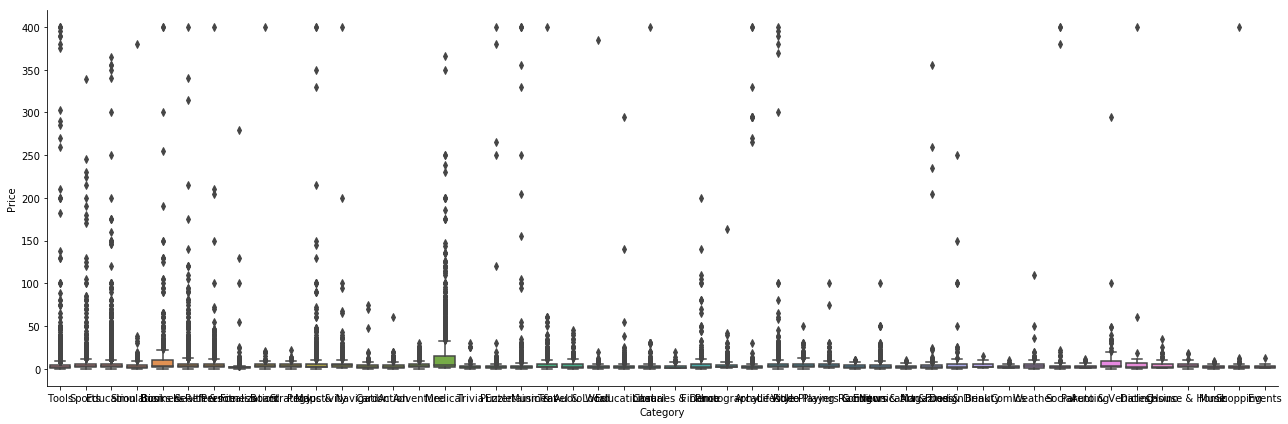

In [82]:
# посмотрим на разброс ценника по категориям. Видим, что есть выбросы по цене
sns.catplot(
    x='Category', 
    y='Price', 
    data=apps_not_free, 
    kind='box', 
    height=6, 
    aspect=3); 

#### Найдем ТОП самых дорогих приложений и категорий

In [43]:
#Топ N самых дорогих приложений
N = 30
most_expensive = apps_not_free[["Category","App Name", "Price", "Currency", "Price_rub"]].sort_values(by="Price_rub", ascending=False).head(N)
most_expensive

,Category,App Name,Price,Currency,Price_rub
544468,Productivity,MESH Connect,400.00,USD,29649.440000
817106,Casual,Most Expensive Clicker,399.99,USD,29648.698764
1602171,Business,I'm Rich - VIP Club Limited,399.99,USD,29648.698764
20127,Tools,TEST EGY,399.99,USD,29648.698764
1444845,Puzzle,Plasma duct - Premium Game,399.99,USD,29648.698764
921941,Entertainment,Luxsure,399.99,USD,29648.698764
1399820,Board,Most expensive word game,399.99,USD,29648.698764
1698479,Productivity,Report Form Pro Nitro,399.99,USD,29648.698764
1580432,Arcade,Baby Nightmares,399.99,USD,29648.698764
1327436,Social,Youmeunit PRO — ver.4U4M34353RY1,399.99,USD,29648.698764


In [31]:
# Топ N cамые дорогие категории (мера - среднее значение цены в категории)
N = 20
apps_not_free.groupby(['Category']).Price_rub.agg(['mean']).sort_values(by="mean", ascending=False).head(N)

,mean
Category,
Dating,1710.278531
Medical,1237.780131
Business,911.405656
Art & Design,707.384786
Sports,590.011184
Social,588.716585
Auto & Vehicles,560.887035
Food & Drink,541.369680
Shopping,515.382606


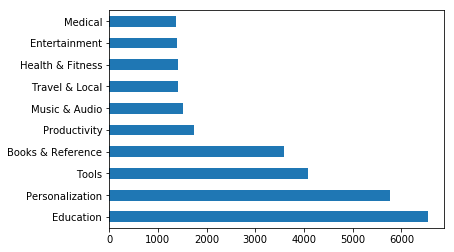

In [38]:
#второй вариант- категории, которые содержат наибольшее количество платных приложений 
apps_expensive = apps_not_free[["Category","App Name", "Price", "Currency", "Price_rub"]].sort_values(by="Price_rub", ascending=False)
apps_expensive['Category'].value_counts().head(10).plot.barh()

#### Найдем ТОП   категорий с приложениями  без отзывов

In [49]:
apps_without_feedback = apps[apps["Rating Count"] == 0]

In [50]:
# Топ категорий, содержащих самое большое количество приложений без отзывов (Rating Count = 0)
apps_without_feedback['Category'].value_counts()

Education                  111528
Business                    91652
Music & Audio               74406
Lifestyle                   62539
Tools                       56922
Entertainment               54003
Food & Drink                50555
Books & Reference           49454
Health & Fitness            49216
Shopping                    41939
Productivity                40487
Travel & Local              34923
Personalization             31201
Finance                     25711
Communication               22890
Arcade                      22392
Casual                      20288
Sports                      20259
Social                      18801
Puzzle                      18330
Medical                     17255
News & Magazines            17078
Photography                 12541
Maps & Navigation           11313
Art & Design                 9368
Events                       8916
Action                       8714
Educational                  8648
House & Home                 8631
Auto & Vehicle

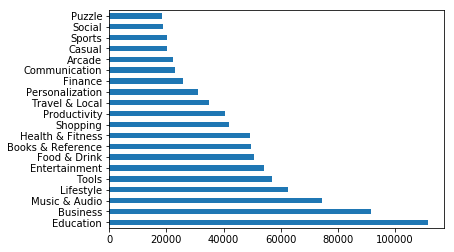

In [51]:
apps_without_feedback['Category'].value_counts().head(20).plot.barh()

#### Найдем ТОП  по скачиванию категорий бесплатными приложениями  с рекламой и возможностью покупок 

In [52]:
apps_ad_purchases = apps[(apps["In App Purchases"] == True)&(apps["Ad Supported"] == True)& (apps["Free"] == True)]
apps_ad_purchases.shape

(141058, 26)

In [53]:
#Топ N приложений по количеству скачиваний
N = 30
top_apps = apps_ad_purchases[["Category","App Name", "Maximum Installs","Rating","Rating Count", "Content Rating","Price", "Currency", "Price_rub"]].sort_values(by="Maximum Installs", ascending=False).head(N)
top_apps

,Category,App Name,Maximum Installs,Rating,Rating Count,Content Rating,Price,Currency,Price_rub
2222701,Social,Facebook,6782619635,2.3,117850066.0,Teen,0.0,USD,0.0
304824,Social,Instagram,3559871277,3.8,120206190.0,Teen,0.0,USD,0.0
787700,Arcade,Subway Surfers,1704495994,4.6,5304826.0,Everyone 10+,0.0,USD,0.0
731501,Tools,SHAREit - Transfer & Share,1666016612,4.2,16023749.0,Everyone,0.0,USD,0.0
65037,Social,TikTok,1645811582,4.4,36446381.0,Teen,0.0,USD,0.0
1845543,Social,Snapchat,1621265491,4.3,26340056.0,Teen,0.0,USD,0.0
286345,Casual,Candy Crush Saga,1208422684,4.6,31476637.0,Everyone,0.0,USD,0.0
2301157,Communication,Viber Messenger - Free Video Calls & Group Chats,979421586,4.4,15045580.0,Everyone,0.0,USD,0.0
1928258,Communication,imo free video calls and chat,926726001,4.1,6921757.0,Everyone,0.0,USD,0.0
891815,Casual,My Talking Tom,919958421,4.3,16835698.0,Everyone,0.0,USD,0.0


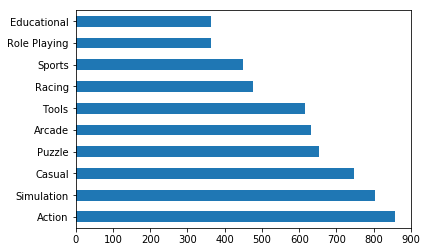

In [59]:
#TOP N категорий из 10000, максимально скачиваемых с рекламой и покупками
N=10
apps_ad_purchases2= apps_ad_purchases[["Category","App Name", "Maximum Installs","Rating","Rating Count", "Content Rating","Price", "Currency", "Price_rub"]].sort_values(by="Maximum Installs", ascending=False).head(10000)
apps_ad_purchases2['Category'].value_counts().head(N).plot.barh()